In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

import warnings
warnings.filterwarnings('ignore')

In [12]:
import numpy as np

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

def plot_iris_clustering(fignum, X, y, title, centroids=None, label_names=None):
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    labels = y

    if label_names is not None:
        for name, label in label_names:
            ax.text3D(X[y == label, 3].mean(),
                      X[y == label, 0].mean(),
                      X[y == label, 2].mean() + 2, name,
                      horizontalalignment='center',
                      bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
    
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')
    
    if centroids is not None:
        ax.scatter(centroids[:, 3], centroids[:, 0], centroids[:, 2],
               c='red', edgecolor='k', s=200, marker='x', linewidths=3)

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(title)
    ax.dist = 12
    
    plt.show()

# K-Means

El Algoritmo K-Means genera clusters de datos a partir de intentar separar samples en n grupos de igual varianza, minimizando un criterio conocido como inercia o "whithin cluster sum-of-squares". Este algoritmo requiere como hiperparametro la cantidad de clusters a encontrar. Escala bien con un gran numero de muestras y es utilizado para muchas areas de aplicacion en diferentes campos.

## Carga Inicial del Set de Datos Iris

Utilizamos el set de datos iris ya utilizado en otras oportunidades, el cual tiene 3 dimensiones y tenemos para cada uno de los puntos, una categoria especifica que usaremos como control.

El objetivo que tendremos en general con es sin conocer los labels, intentar recuperar los clusters utilizando K-Means en diferentes escenarios de inicializacion.

En la visualizacion de abajo se ve en 3 dimensiones, cada uno de los puntos del set de datos de Iris y a que categoria pertenece cada uno de esos puntos.

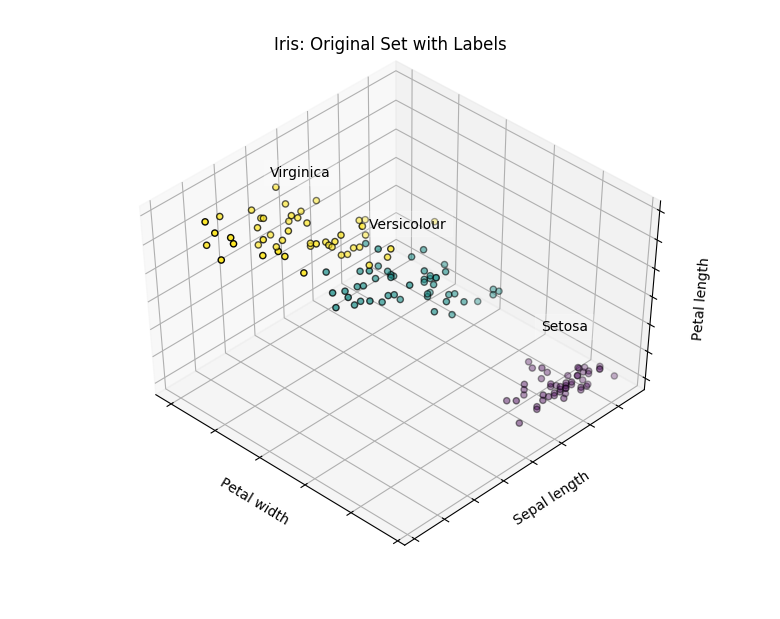

In [13]:
from sklearn.cluster import KMeans
from sklearn import datasets

iris = datasets.load_iris()

fignum = 1

X = iris.data
y = iris.target
label_names = [('Setosa', 0),
               ('Versicolour', 1),
               ('Virginica', 2)]

plot_iris_clustering(fignum, X, y, "Iris: Original Set with Labels", label_names=label_names)

## Aplicando y Visualizando los resultados de K-Means

El objeto KMeans de sklearn realiza el clustering usando k-means considerando los siguientes parametros:
    
- **n_clusters:** numero de clusters a obtener
- **init:** forma de inicializacion, puede ser 'random', 'k-means++' o especificamente indicar aquellos centroides a utilizar via array de numpy.
- **n_init:** La cantidad de veces que k-means va a ser ejecutado usando distintos seeds de centroides. Los resultados finales van a ser la mejor salida obtenida de las consecutivas corridas indicadas por n_init en terminos de 'inercia'. Este valor es muy util dado que por ejemplo una inicializacion en 1, puede llevarlo a una muy mala ejecucion.

Mas informacion en:

- http://scikit-learn.org/stable/modules/clustering.html#k-means
- http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
- http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html


In [14]:
def kmeans_clustering(n_clusters=3, init='random', n_init=10):

    fignum = 1

    iris = datasets.load_iris()
    x = iris.data

    model = KMeans(n_clusters=n_clusters, init=init, n_init=n_init)
    model = model.fit(x)
    X = x
    y = model.labels_
    plot_iris_clustering(fignum, X, y, "K-Means: %s, %s clusters, %i iterations" % (init, n_clusters, n_init), model.cluster_centers_)


## K-Means: Inicializacion Random, con 3 clusters y 50 iteraciones.

Usamos la version standard de k-means, con inicializacion random para los centroides y 50 iteraciones para hallar las 3 categorias que conocemos del set Iris.

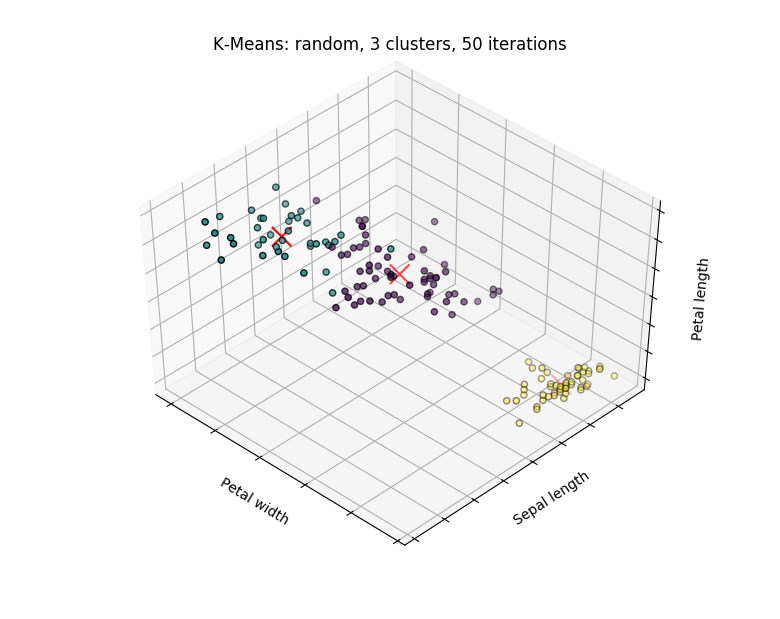

In [15]:
kmeans_clustering(n_clusters=3, init='random', n_init=50)

## K-Means: Inicializacion Random, con 3 clusters y 1 iteracion.

Usamos la version standard de k-means, con inicializacion random para los centroides y 1 iteraciones, reduciendo la posibilidad de obtener una buena inicializacion para el algoritmo, independientemente que en la mayoria de los casos converge a resultados aceptables.

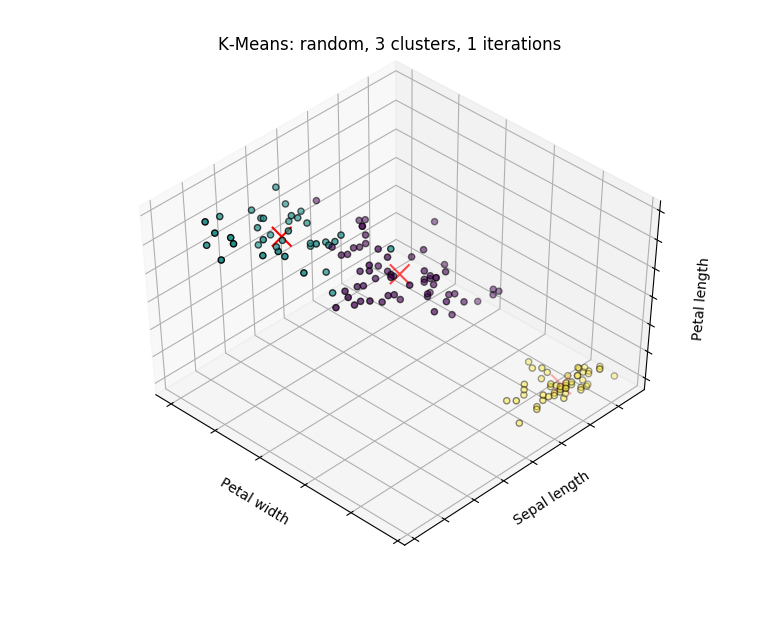

In [16]:
kmeans_clustering(n_clusters=3, init='random', n_init=1)

## K-Means: Inicializacion Random, con 9 clusters y 50 iteraciones

Dado que k es el hiperparametro a utilizar, podemos por ejemplo tambien intentar hallar 9 clusters, sobre los mismos datos.

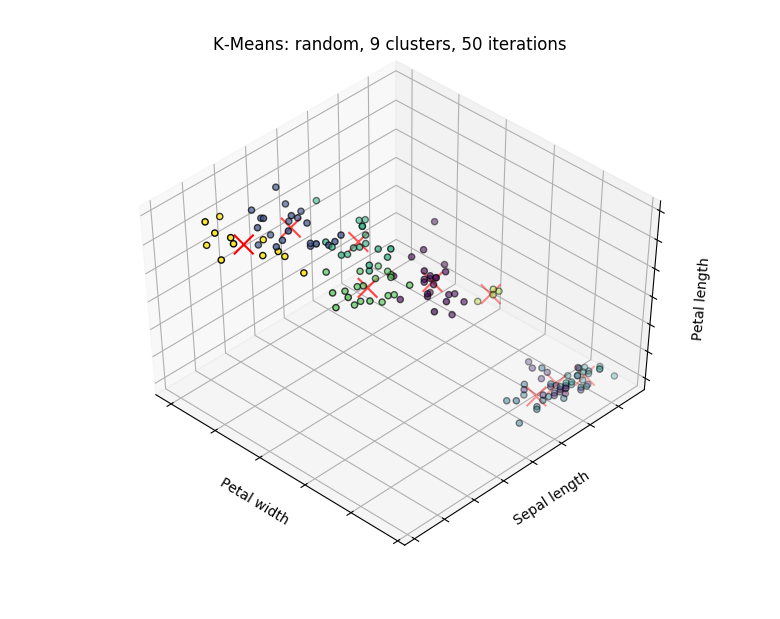

In [17]:
kmeans_clustering(n_clusters=9, init='random', n_init=50)

## K-Means++ con 3 clusters y 10 iteraciones

Por ultimo tambien podemos utilizar k-means++ para obtener nuestros 3 clusters

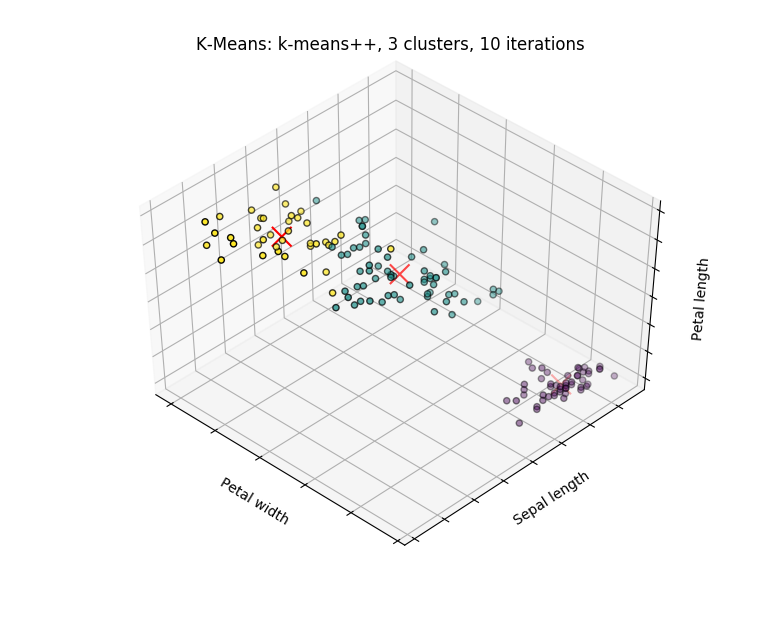

In [18]:
kmeans_clustering(n_clusters=3, init='k-means++')